In [7]:
import pandas as pd
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage import exposure

In [14]:
raster = 'DigitalTerrainModelFormatTIFF(1).tiff'
with rasterio.open(raster) as source:
    img = source.read(1)  # Read raster band 1 as a numpy array
    affine = source.transform

In [15]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

In [16]:
image_max = ndi.maximum_filter(img, size=3, mode='constant')

In [17]:
coordinates = peak_local_max(img, min_distance=2)
X = coordinates[:, 1]
y = coordinates[:, 0]

# reproject data array into original dataset
xs, ys = affine * (X, y)

# create some datasheet
df = pd.DataFrame({'X': xs, 'Y': ys})

In [18]:
count = df['X'].count()
print('Total trees : {i}'.format(i=count))
df.to_csv(r'test_output.csv')

Total trees : 782


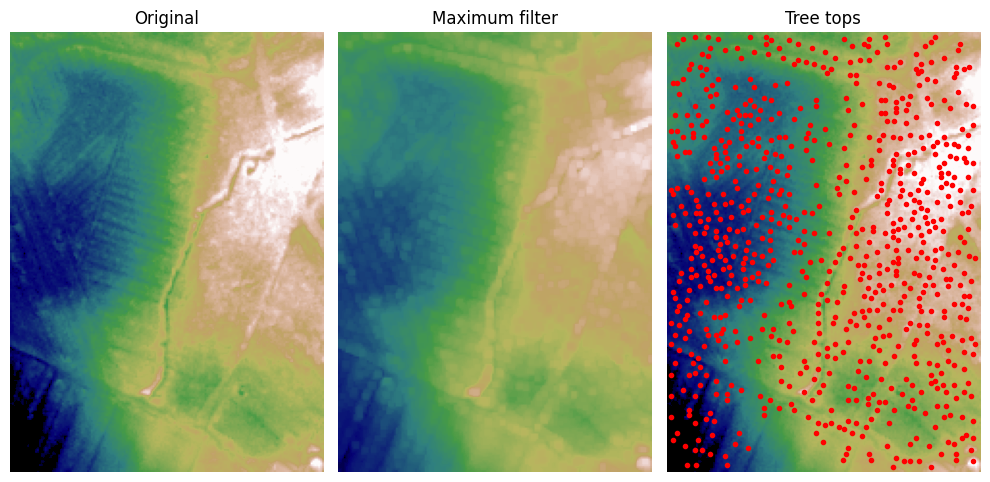

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)
cmap = plt.cm.gist_earth
ax = axes.ravel()
ax[0].imshow(img_rescale, cmap)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(img_rescale, cmap)
ax[2].autoscale(False)
ax[2].plot(X, y, 'r.')
ax[2].axis('off')
ax[2].set_title('Tree tops')

fig.tight_layout()
plt.show()

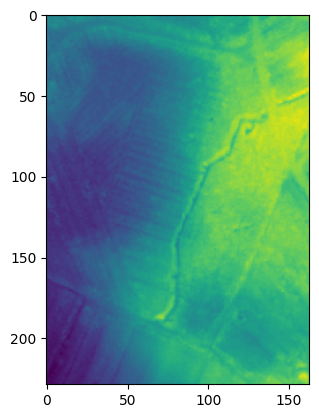

In [34]:
plt.imshow(img)